In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


True

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/My Drive/NLP datasets/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df1=df[["v1","v2"]]

In [8]:
df1['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [9]:
df1.rename(columns={'v1':'class', 'v2':'sms'}, inplace = True)
df1.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5, 1.0, 'Customizing pie chart')

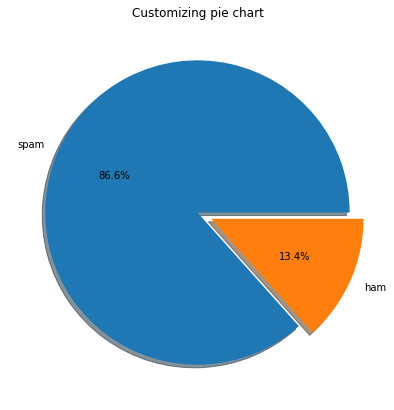

In [10]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(df1["class"].value_counts(), explode = [0,0.1], labels = set(df1["class"]), shadow = True,autopct ='%1.1f%%')
ax.set_title("Customizing pie chart")

In [11]:
df1.isnull().sum()

class    0
sms      0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['class'] = le.fit_transform(df1['class'])

# NLTK preprocessing

In [13]:
import re, string
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk.stem
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [14]:
def clean_text(text):
    stop_words = stopwords.words('english')
    cleaned_tokens = []

    #convert to lower
    text = text.lower()

    #tokenize text
    tokenized_text = word_tokenize(text)

    for token, tag in pos_tag(tokenized_text):
        # only keep alpha-numeric characters
        token = re.sub("[^0-9a-z]", " ", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        
        #Lemmatize
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        #Don't add if token is a stop word or puntuation.
        if len(token) > 0 and token not in string.punctuation and token not in stop_words:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [15]:
ham = list( df1.sms[df1['class'] == 0] )
ham_clean = [clean_text(i) for i in ham]

spam = list( df1.sms[df1['class'] == 1] )
spam_clean = [clean_text(i) for i in spam]

In [16]:
 df1['Cleaned text'] = [" ".join(clean_text(i)) for i in df1.sms]

In [17]:
df1.head()

,class,sms,Cleaned text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n gr...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n t think go usf live around though


# TF-IDF Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(df1['Cleaned text'])
print(type(vector))
x = vector.toarray()
print(x)
y= df1['class']

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Word Clouds

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
def Word_Cloud(df, title):
    comment_words = ""
    stopwords = set(STOPWORDS)
    for val in df:
        comment_words += " ".join(val)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    plt.figure(figsize = (4,4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()

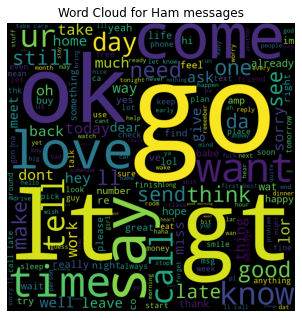

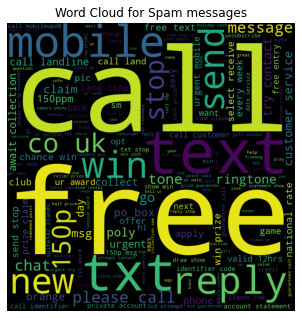

In [21]:
Word_Cloud(ham_clean, 'Word Cloud for Ham messages')
Word_Cloud(spam_clean, 'Word Cloud for Spam messages')

# Classification Models

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [23]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,classification_report

## Naive Bayes

In [24]:
from sklearn.naive_bayes  import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
ypred_gnb = gnb.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_gnb)}')
print(f'Recall : {recall_score(y_test, ypred_gnb)}')
print(f'F1 score : {f1_score(y_test, ypred_gnb)}')

Accuracy : 0.8600896860986547
Recall : 0.896551724137931
F1 score : 0.6666666666666666


In [25]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
ypred_nb = nb.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_nb)}')
print(f'Recall : {recall_score(y_test, ypred_nb)}')
print(f'F1 score : {f1_score(y_test, ypred_nb)}')

Accuracy : 0.9596412556053812
Recall : 0.7413793103448276
F1 score : 0.8514851485148515


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
ypred_logr = log_reg.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_logr)}')
print(f'Recall : {recall_score(y_test, ypred_logr)}')
print(f'F1 score : {f1_score(y_test, ypred_logr)}')

Accuracy : 0.9515695067264573
Recall : 0.6896551724137931
F1 score : 0.8163265306122449


In [27]:
# For imbalanced dataset
log_reg2 = LogisticRegression(class_weight = {0:1 , 1:6}, penalty = 'l2')
log_reg2.fit(x_train,y_train)
ypred_logr2 = log_reg2.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_logr2)}')
print(f'Recall : {recall_score(y_test, ypred_logr2)}')
print(f'F1 score : {f1_score(y_test, ypred_logr2)}')

Accuracy : 0.9820627802690582
Recall : 0.8908045977011494
F1 score : 0.9393939393939394


## Decision Tree

In [28]:
from sklearn import tree
dt_clf = tree. DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
ypred_dt = dt_clf.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_dt)}')
print(f'Recall : {recall_score(y_test, ypred_dt)}')
print(f'F1 score : {f1_score(y_test, ypred_dt)}')

Accuracy : 0.9605381165919282
Recall : 0.8390804597701149
F1 score : 0.8690476190476191


In [29]:
# For imbalanced dataset
dt_clf2 = tree.DecisionTreeClassifier(class_weight={0:1 , 1:6})
dt_clf2.fit(x_train, y_train)
ypred_dt2 = dt_clf2.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_dt2)}')
print(f'Recall : {recall_score(y_test, ypred_dt2)}')
print(f'F1 score : {f1_score(y_test, ypred_dt2)}')

Accuracy : 0.9542600896860987
Recall : 0.8793103448275862
F1 score : 0.8571428571428572


## K-Nearest Neighbour

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
ypred_knn = knn.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_knn)}')
print(f'Recall : {recall_score(y_test, ypred_knn)}')
print(f'F1 score : {f1_score(y_test, ypred_knn)}')

Accuracy : 0.8896860986547085
Recall : 0.29310344827586204
F1 score : 0.4533333333333333


In [31]:
knn2 = KNeighborsClassifier(weights='distance')
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
knn2.fit(x_train, y_train)
ypred_knn2 = knn2.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_knn2)}')
print(f'Recall : {recall_score(y_test, ypred_knn2)}')
print(f'F1 score : {f1_score(y_test, ypred_knn2)}')

Accuracy : 0.915695067264574
Recall : 0.45977011494252873
F1 score : 0.6299212598425197


## Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1)
rf_clf.fit(x_train,y_train)
ypred_rf = rf_clf.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_rf)}')
print(f'Recall : {recall_score(y_test, ypred_rf)}')
print(f'F1 score : {f1_score(y_test, ypred_rf)}')

Accuracy : 0.9713004484304932
Recall : 0.8160919540229885
F1 score : 0.8987341772151899


In [33]:
# For imbalanced dataset
rf_clf2 = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1, class_weight='balanced') #or class_weight={0:1 , 1:6})
rf_clf2.fit(x_train,y_train)
ypred_rf2 = rf_clf2.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_rf2)}')
print(f'Recall : {recall_score(y_test, ypred_rf2)}')
print(f'F1 score : {f1_score(y_test, ypred_rf2)}')

Accuracy : 0.9713004484304932
Recall : 0.8160919540229885
F1 score : 0.8987341772151899


## Linear SVC

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
ypred_svc = svc.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_svc)}')
print(f'Recall : {recall_score(y_test, ypred_svc)}')
print(f'F1 score : {f1_score(y_test, ypred_svc)}')

Accuracy : 0.967713004484305
Recall : 0.7988505747126436
F1 score : 0.8853503184713376


In [35]:
# For imbalanced dataset
svc2=SVC(kernel='linear',class_weight='balanced', probability=True)
svc2.fit(x_train,y_train)
ypred_svc2 = svc2.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_svc2)}')
print(f'Recall : {recall_score(y_test, ypred_svc2)}')
print(f'F1 score : {f1_score(y_test, ypred_svc2)}')

Accuracy : 0.9766816143497757
Recall : 0.8563218390804598
F1 score : 0.9197530864197531


## Adaboost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf=AdaBoostClassifier(random_state=0,learning_rate=0.1)
ab_clf.fit(x_train,y_train)
ypred_ab=ab_clf.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_ab)}')
print(f'Recall : {recall_score(y_test, ypred_ab)}')
print(f'F1 score : {f1_score(y_test, ypred_ab)}')

Accuracy : 0.9246636771300448
Recall : 0.5229885057471264
F1 score : 0.6842105263157895


## Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf.fit(x_train, y_train)
ypred_gb=gb_clf.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_gb)}')
print(f'Recall : {recall_score(y_test, ypred_gb)}')
print(f'F1 score : {f1_score(y_test, ypred_gb)}')

Accuracy : 0.9461883408071748
Recall : 0.7816091954022989
F1 score : 0.8192771084337349


## XGB Boosting

In [38]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train, y_train)  
ypred_xgb = xgb_clf.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_xgb)}')
print(f'Recall : {recall_score(y_test, ypred_xgb)}')
print(f'F1 score : {f1_score(y_test, ypred_xgb)}')

Accuracy : 0.9605381165919282
Recall : 0.764367816091954
F1 score : 0.8580645161290322


In [39]:
# For imbalanced dataset
xgb_clf2 = xgb.XGBClassifier(scale_pos_weight=6)
xgb_clf2.fit(x_train, y_train)  
ypred_xgb2 = xgb_clf2.predict(x_test)

print(f'Accuracy : {accuracy_score(y_test, ypred_xgb2)}')
print(f'Recall : {recall_score(y_test, ypred_xgb2)}')
print(f'F1 score : {f1_score(y_test, ypred_xgb2)}')

Accuracy : 0.9596412556053812
Recall : 0.8793103448275862
F1 score : 0.8717948717948718


# Model Comparison

In [40]:
model_pred = {'Naive Bayes' : ypred_nb, 
              'Logistic Regression' : ypred_logr2, 
              'Decision Tree Classifier' : ypred_dt2, 
              'KNN' : ypred_knn2, 
              'Random Forest Classifier' : ypred_rf, 
              'Linear SVC' : ypred_svc2, 
              'Adaboost' : ypred_ab,
              'Gradient Boosting' : ypred_gb,
              'XGB boosting' : ypred_xgb2}

In [41]:
for v,k in model_pred.items():
    print(f'{v} :\n{confusion_matrix(y_test, model_pred[v])}\n\n\n')

Naive Bayes :
[[941   0]
 [ 45 129]]



Logistic Regression :
[[940   1]
 [ 19 155]]



Decision Tree Classifier :
[[911  30]
 [ 21 153]]



KNN :
[[941   0]
 [ 94  80]]



Random Forest Classifier :
[[941   0]
 [ 32 142]]



Linear SVC :
[[940   1]
 [ 25 149]]



Adaboost :
[[940   1]
 [ 83  91]]



Gradient Boosting :
[[919  22]
 [ 38 136]]



XGB boosting :
[[917  24]
 [ 21 153]]





In [42]:
for v,k in model_pred.items():
    print(f'{v} :\n{classification_report(y_test, model_pred[v])}\n\n\n')

Naive Bayes :
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       941
           1       1.00      0.74      0.85       174

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115




Logistic Regression :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.99      0.89      0.94       174

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115




Decision Tree Classifier :
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       941
           1       0.84      0.88      0.86       174

    accuracy                           0.95      1115
   macro avg       0.91      0.92      0.91      1115
weigh

In [43]:
comp = [[accuracy_score(y_test, ypred_nb), recall_score(y_test, ypred_nb), f1_score(y_test, ypred_nb)], 
            [accuracy_score(y_test, ypred_logr2), recall_score(y_test, ypred_logr2), f1_score(y_test, ypred_logr2)], 
            [accuracy_score(y_test, ypred_dt2), recall_score(y_test, ypred_dt2), f1_score(y_test, ypred_dt2)], 
            [accuracy_score(y_test, ypred_knn2), recall_score(y_test, ypred_knn2), f1_score(y_test, ypred_knn2)], 
            [accuracy_score(y_test, ypred_rf), recall_score(y_test, ypred_rf), f1_score(y_test, ypred_rf)], 
            [accuracy_score(y_test, ypred_svc2), recall_score(y_test, ypred_svc2), f1_score(y_test, ypred_svc2)],
            [accuracy_score(y_test, ypred_ab), recall_score(y_test, ypred_ab), f1_score(y_test, ypred_ab)],
            [accuracy_score(y_test, ypred_gb), recall_score(y_test, ypred_gb), f1_score(y_test, ypred_gb)],
            [accuracy_score(y_test, ypred_xgb2), recall_score(y_test, ypred_xgb2), f1_score(y_test, ypred_xgb2)]]

Comparison_df = pd.DataFrame(comp, columns = ['Accuracy', 'Recall Score', 'F1-Score'], 
             index = ['Naive Bayes Classification', 'Logistic Regression', 'Decision Tree Classifier', 'K-Nearest Neighbour', 'Random Forest Classifier', 'Linear Support Vector Classifier', 'Adaboost' ,'Gradient Boosting' ,'XGB boosting'])
Comparison_df.sort_values(by=['Accuracy'], ascending=False)

,Accuracy,Recall Score,F1-Score
Logistic Regression,0.982063,0.890805,0.939394
Linear Support Vector Classifier,0.976682,0.856322,0.919753
Random Forest Classifier,0.971300,0.816092,0.898734
Naive Bayes Classification,0.959641,0.741379,0.851485
XGB boosting,0.959641,0.879310,0.871795
Decision Tree Classifier,0.954260,0.879310,0.857143
Gradient Boosting,0.946188,0.781609,0.819277
Adaboost,0.924664,0.522989,0.684211
K-Nearest Neighbour,0.915695,0.459770,0.629921


# Model Summary

**Out of all models Logistic Regression performed best overall (in terms of accuracy, recall and f1-score) follwed by Linear Support Vector Classifier and Random Forest.**